<a href="https://colab.research.google.com/github/Wan-Shi-Tong-bi/5Ws/blob/main/colab/1.05_AnalyzingReadsByPosition-start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# On Unix you could use wget to download the fasta file (just uncomment the following line)
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

# On Windows you have to download the file manually into your working directory

--2021-11-16 10:15:20--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.67.3.59, 18.67.3.223, 18.67.3.68, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.67.3.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.1s    

2021-11-16 10:15:20 (1.93 MB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # name 
            seq = fh.readline().rstrip() #  sequence
            fh.readline() #  placeholder 
            qual = fh.readline().rstrip() # quality 
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [ ]:
print(quals)

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################', 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################', "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################", "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################", '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################', '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GEE.==A?C##

In [ ]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [ ]:
def createHist(qualities):
    hist = [0]*50
    for read in qualities:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


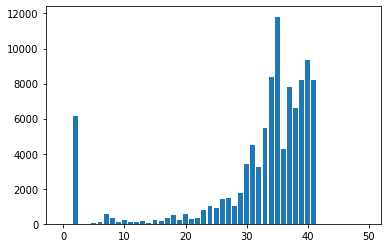

In [ ]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

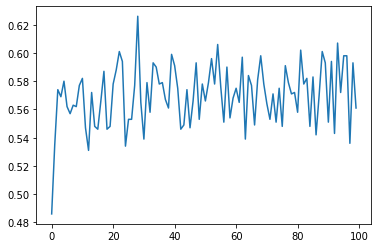

In [ ]:
def findGCByPos(reads):
    """ Find the GC ratio at each position in the read
        Calculates a movinger GC percentage level
        param reads: list of dna-reads
        return: list of moving gc percentages
    """
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'A': 21132, 'C': 28272, 'G': 28742, 'N': 18, 'T': 21836})

In [ ]:
!wget https://github.com/ulat/htl_bioinformatik_5m/blob/master/1.05.vars.pkl
!wget https://github.com/ulat/htl_bioinformatik_5m/blob/master/1.05.vars2.pkl

--2021-11-16 10:20:00--  https://github.com/ulat/htl_bioinformatik_5m/blob/master/1.05.vars.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1.05.vars.pkl.1’

1.05.vars.pkl.1         [ <=>                ] 154.52K  --.-KB/s    in 0.04s   

2021-11-16 10:20:01 (3.43 MB/s) - ‘1.05.vars.pkl.1’ saved [158232]

--2021-11-16 10:20:01--  https://github.com/ulat/htl_bioinformatik_5m/blob/master/1.05.vars2.pkl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1.05.vars2.pkl.1’

1.05.vars2.pkl.1        [ <=>                ] 159.11K  --.-KB/s    in 0.06s   

2021-11-16 10:20:01 (2.78 MB/s) - ‘1.05.vars2.pkl.1’ saved [162929]



In [ ]:
import pickle as pkl
with open('1.05.vars.pkl', 'rb') as f:
    _seqs, _quals  = pkl.load(f)
    
with open('1.05.vars2.pkl', 'rb') as f:
    _gc, _count  = pkl.load(f)
    
import unittest
class TestNotebook(unittest.TestCase):    
    def test_notebook(self):        
        self.assertEqual(h, [0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0])
        self.assertEqual((_seqs, _quals), readFastq('SRR835775_1.first1000.fastq'))
        self.assertEqual(_gc, gc)
        self.assertEqual(_count, count)
unittest.main(argv=[''], verbosity=2, exit=False)

test_notebook (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


# New section